In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#reading Orders CSV file
ordersdf = pd.read_csv("Orders.Data.csv")

#print out the basic info
print(ordersdf.shape)
print(ordersdf.dtypes)

(99441, 8)
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [3]:
ordersdf.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,7/9/2017 21:57,7/9/2017 22:10,7/11/2017 14:58,7/26/2017 10:57,8/1/2017 0:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,4/11/2017 12:22,4/13/2017 13:25,NaN,NaN,5/9/2017 0:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,5/16/2017 13:10,5/16/2017 13:22,5/22/2017 10:07,5/26/2017 12:55,6/7/2017 0:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1/23/2017 18:29,1/25/2017 2:50,1/26/2017 14:16,2/2/2017 14:08,3/6/2017 0:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,7/29/2017 12:05,8/10/2017 19:45,8/16/2017 17:14,8/23/2017 0:00


In [4]:
#Renaming the columns that are important for us
ordersdf = ordersdf.rename(columns = {"order_purchase_timestamp": "Purchased_At",
                         "order_approved_at":"Approved_At"}) 
ordersdf.head(10)

,order_id,customer_id,order_status,Purchased_At,Approved_At,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,7/9/2017 21:57,7/9/2017 22:10,7/11/2017 14:58,7/26/2017 10:57,8/1/2017 0:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,4/11/2017 12:22,4/13/2017 13:25,NaN,NaN,5/9/2017 0:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,5/16/2017 13:10,5/16/2017 13:22,5/22/2017 10:07,5/26/2017 12:55,6/7/2017 0:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1/23/2017 18:29,1/25/2017 2:50,1/26/2017 14:16,2/2/2017 14:08,3/6/2017 0:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,7/29/2017 12:05,8/10/2017 19:45,8/16/2017 17:14,8/23/2017 0:00


In [5]:
#Keeping relevant columns only
ordersdf = ordersdf[['Purchased_At', 'Approved_At']]
ordersdf.head(10)

,Purchased_At,Approved_At
0,10/2/2017 10:56,10/2/2017 11:07
1,7/24/2018 20:41,7/26/2018 3:24
2,8/8/2018 8:38,8/8/2018 8:55
3,11/18/2017 19:28,11/18/2017 19:45
4,2/13/2018 21:18,2/13/2018 22:20
5,7/9/2017 21:57,7/9/2017 22:10
6,4/11/2017 12:22,4/13/2017 13:25
7,5/16/2017 13:10,5/16/2017 13:22
8,1/23/2017 18:29,1/25/2017 2:50
9,7/29/2017 11:55,7/29/2017 12:05


In [6]:
#typecasting from object to datetime
ordersdf['Purchased_At'] = pd.to_datetime(ordersdf['Purchased_At'])
ordersdf['Approved_At'] = pd.to_datetime(ordersdf['Approved_At'])
ordersdf.dtypes

Purchased_At    datetime64[ns]
Approved_At     datetime64[ns]
dtype: object

In [7]:
#calculating the difference between order purchase time and order approval time
between_order_approval = ordersdf['Approved_At'] - ordersdf['Purchased_At']

#let's see the time difference between order and approval for each order
timediffseries = between_order_approval.apply(lambda x: (x.total_seconds())/3600)
timediffseries

0         0.183333
1        30.716667
2         0.283333
3         0.283333
4         1.033333
           ...    
99436     0.000000
99437     0.200000
99438     0.300000
99439     0.133333
99440    14.383333
Length: 99441, dtype: float64

In [8]:
#calculating the average of time difference b/w order purchase time & order approval time
between_order_approval.apply(lambda x: (x.total_seconds())/3600).mean()

10.4199069644067

In [9]:
#Storing time difference in a dataframe
time_diff_df = pd.DataFrame(timediffseries,index = np.arange(len(timediffseries)),columns=['TimeDiff'])

time_diff_df.head(100)

,TimeDiff
0,0.183333
1,30.716667
2,0.283333
3,0.283333
4,1.033333
...,...
95,0.533333
96,0.283333
97,0.233333
98,0.250000


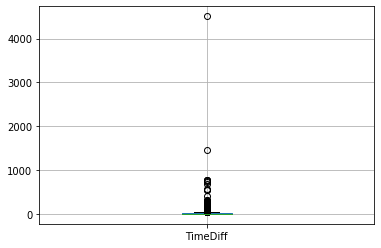

In [10]:
#box plot
time_diff_df.boxplot(column='TimeDiff', sym='o', return_type='axes') 

In [11]:
#values above 4k & 1k can be considered as extreme outliers
#hence, finding out their indices
time_diff_df[time_diff_df['TimeDiff']>1000]

,TimeDiff
47552,4509.183333
62293,1450.866667


In [13]:
#removing these extreme outliers
subset = time_diff_df[(time_diff_df.index != 47552) & (time_diff_df.index != 62293)]
subset.count()

TimeDiff    99279
dtype: int64

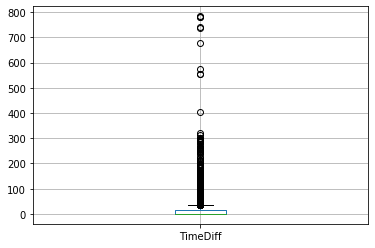

In [14]:
#99441 - 99279 = 102 records are outliers, making the box plot by removing them
subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    99269
dtype: int64


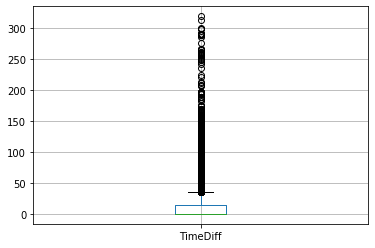

In [15]:
#multiple outliers are still found, applying multiple conditions to get the best box plot without compromising much of the data
subset = time_diff_df[time_diff_df['TimeDiff']<400]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    98627
dtype: int64


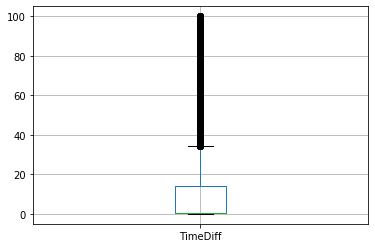

In [17]:
subset = time_diff_df[time_diff_df['TimeDiff']<100]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    97583
dtype: int64


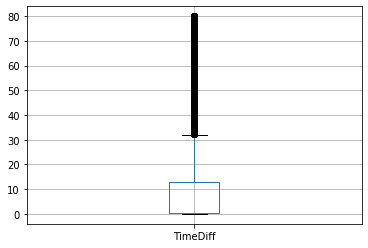

In [18]:
subset = time_diff_df[time_diff_df['TimeDiff']<80]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    63360
dtype: int64


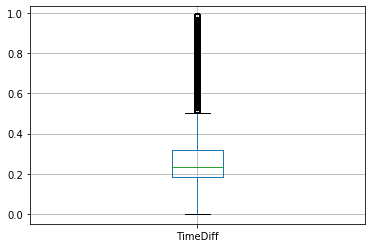

In [19]:
subset = time_diff_df[time_diff_df['TimeDiff']<1]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    96906
dtype: int64


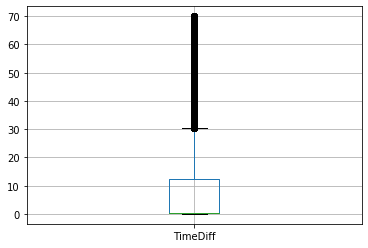

In [20]:
#Although the best box plot is observed for values < 1 but this led to compromising approx 36k of data which cannot be done practically.
subset = time_diff_df[time_diff_df['TimeDiff']<70]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    94547
dtype: int64


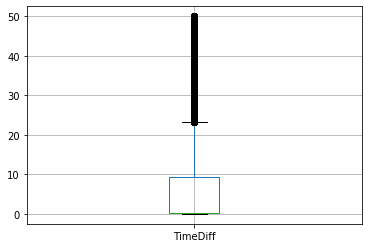

In [21]:
subset = time_diff_df[time_diff_df['TimeDiff']<50]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    71216
dtype: int64


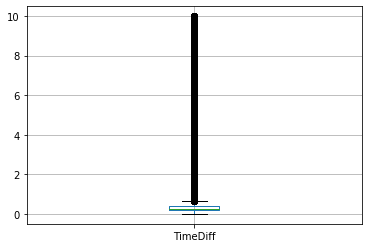

In [22]:
subset = time_diff_df[time_diff_df['TimeDiff']<10]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

In [23]:
#Based on the box plots observed above, all the records that have time difference of less than 50 can be taken into account for BI analysis
#because the data compromised for time difference less than 50 is only 4894(5%) which is acceptable for data as big as 99441.